**Elevate Labs Internship Task 2**

Exploratory Data Analysis (EDA) for Titanic Dataset.


`1. Imports & Data Loading`

In [14]:
# ---------------------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 2. LOAD DATASET
# ---------------------------------------------------------
# Option A (if you downloaded Kaggle CSV locally):
#    df = pd.read_csv('titanic.csv')
#
# Option B (for demonstration):
df = sns.load_dataset('titanic')

# Verify load
print("✅ Titanic dataset loaded for EDA.  Shape:", df.shape)


✅ Titanic dataset loaded for EDA.  Shape: (891, 15)


`2. Quick Peek: head(), tail(), shape, info()`

In [15]:
# ---------------------------------------------------------
# 3. VIEW FIRST AND LAST ROWS
# ---------------------------------------------------------
print(">>> First 5 rows:")
display(df.head())

print("\n>>> Last 5 rows:")
display(df.tail())

# ---------------------------------------------------------
# 4. CHECK SHAPE AND DATA TYPES
# ---------------------------------------------------------
print(f"\nDataset shape: {df.shape} (rows × cols)")

print("\nDataset info:")
df.info()


>>> First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



>>> Last 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True



Dataset shape: (891, 15) (rows × cols)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


`3. Summary Statistics (describe + custom)`

In [18]:
# ---------------------------------------------------------
# 5. SUMMARY STATISTICS FOR NUMERIC COLUMNS
# ---------------------------------------------------------
# describe() gives count, mean, std, min, 25%, 50%, 75%, max
print("Numeric summary (describe):")
display(df.describe())

# ---------------------------------------------------------
# 6. CUSTOM SUMMARY (for all columns, including non-numeric)
# ---------------------------------------------------------
#  - We can also see value_counts for categorical columns.
print("\nFor each column: number of unique values and top value (for categorical):")
for col in df.columns:
    print(f"\nColumn '{col}':")
    print(f" • Unique count       : {df[col].nunique()}")

    if df[col].dtype == 'object' or str(df[col].dtype).startswith('category'):
        if not df[col].mode().empty:
            top_val = df[col].mode()[0]
            top_count = df[col].value_counts().iloc[0]
        else:
            top_val = np.nan
            top_count = 0
        print(f" • Top (most frequent): {top_val}, count: {top_count}")
    else:
        median_val = df[col].median()
        missing_count = df[col].isnull().sum()
        print(f" • Median (if numeric): {median_val}")
        print(f" • Missing values     : {missing_count}")


Numeric summary (describe):


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



For each column: number of unique values and top value (for categorical):

Column 'survived':
 • Unique count       : 2
 • Median (if numeric): 0.0
 • Missing values     : 0

Column 'pclass':
 • Unique count       : 3
 • Median (if numeric): 3.0
 • Missing values     : 0

Column 'sex':
 • Unique count       : 2
 • Top (most frequent): male, count: 577

Column 'age':
 • Unique count       : 88
 • Median (if numeric): 28.0
 • Missing values     : 177

Column 'sibsp':
 • Unique count       : 7
 • Median (if numeric): 0.0
 • Missing values     : 0

Column 'parch':
 • Unique count       : 7
 • Median (if numeric): 0.0
 • Missing values     : 0

Column 'fare':
 • Unique count       : 248
 • Median (if numeric): 14.4542
 • Missing values     : 0

Column 'embarked':
 • Unique count       : 3
 • Top (most frequent): S, count: 644

Column 'class':
 • Unique count       : 3
 • Top (most frequent): Third, count: 491

Column 'who':
 • Unique count       : 3
 • Top (most frequent): man, count: 537


`4. Missing‐Value & Unique‐Value Examination`

In [19]:
# ---------------------------------------------------------
# 7. MISSING VALUES PER COLUMN
# ---------------------------------------------------------
print("Missing values per column:")
display(df.isnull().sum())

# ---------------------------------------------------------
# 8. UNIQUE VALUES PER CATEGORICAL COLUMN
# ---------------------------------------------------------
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns and their unique values:")
for col in categorical_cols:
    print(f" • {col}: {df[col].unique()}")


Missing values per column:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0



Categorical columns and their unique values:
 • sex: ['male' 'female']
 • embarked: ['S' 'C' 'Q' nan]
 • class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
 • who: ['man' 'woman' 'child']
 • deck: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
 • embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
 • alive: ['no' 'yes']


**5. Univariate Analysis (Histograms & Boxplots)**

`5.1 Numeric Histograms`

Numeric columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'] 



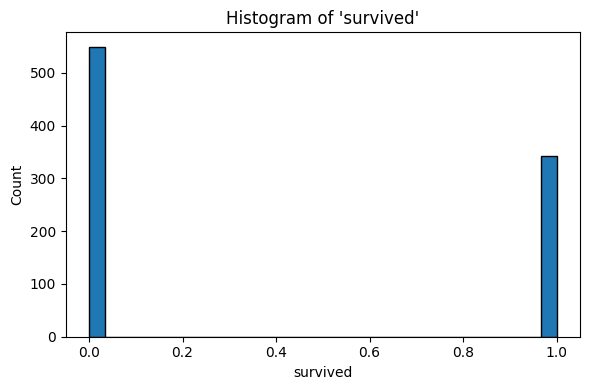

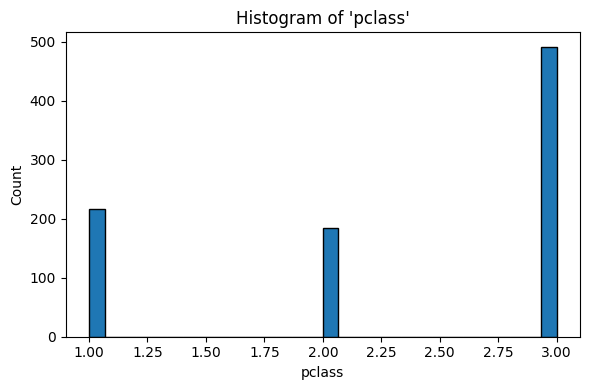

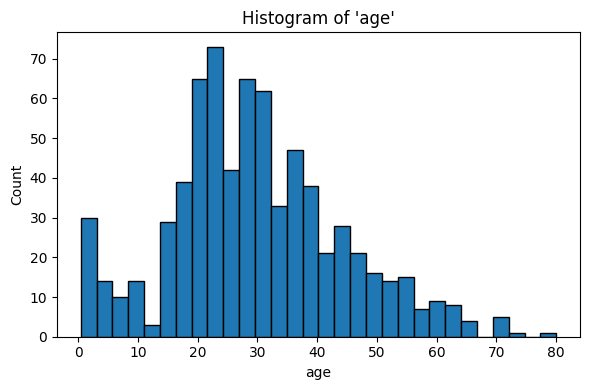

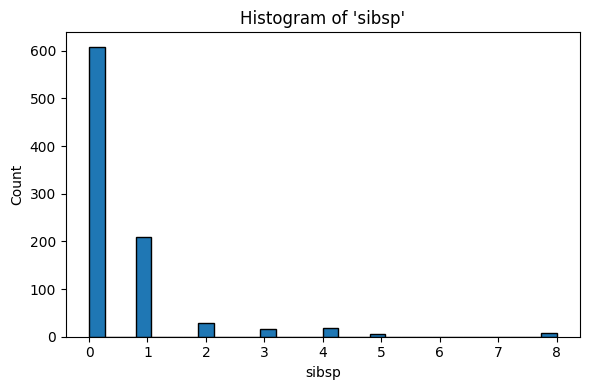

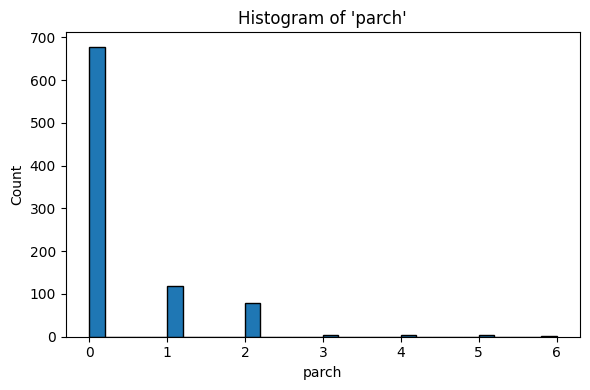

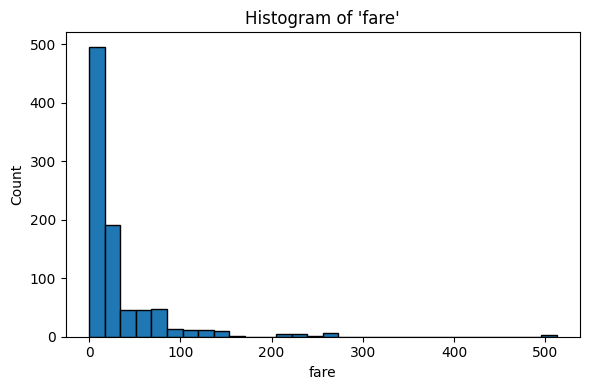

In [20]:
# ---------------------------------------------------------
# 9. HISTOGRAMS FOR NUMERIC FEATURES
# ---------------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# We exclude 'survived' from pure distribution if desired, but we can show it anyway.
print("Numeric columns:", numeric_cols, "\n")

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


`5.2 Numeric Boxplots`

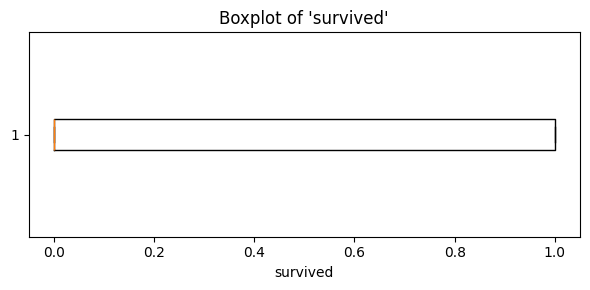

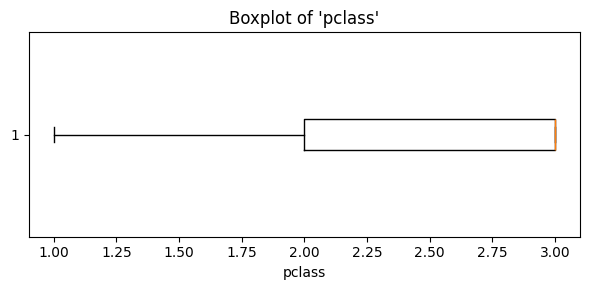

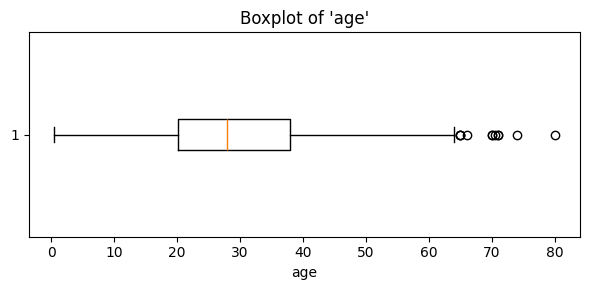

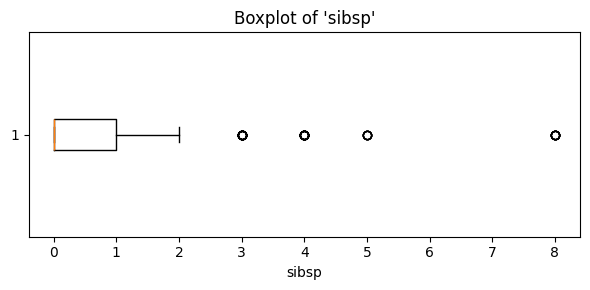

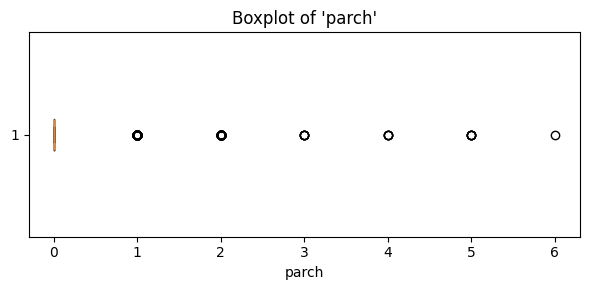

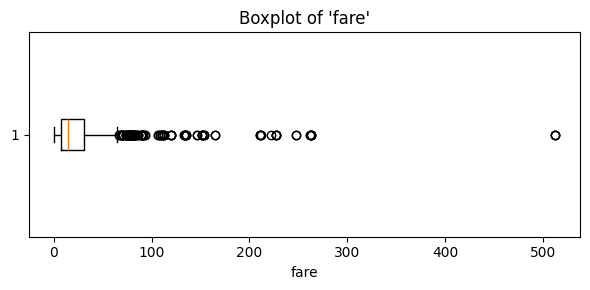

In [21]:
# ---------------------------------------------------------
# 10. BOXPLOTS FOR NUMERIC FEATURES (to see outliers & spread)
# ---------------------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


**6. Bivariate Analysis (Survival vs. Features)**

`6.1 Survival Rate by Gender (sex)`

Survival rate by gender:
 • Female: 0.74 (74.2% survived)
 • Male  : 0.19 (18.9% survived)


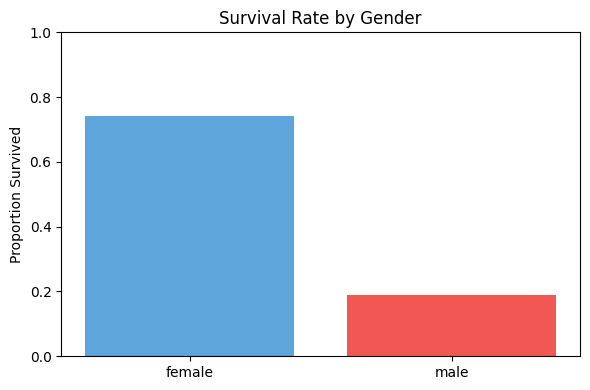

In [22]:
# ---------------------------------------------------------
# 11. SURVIVAL RATE BY GENDER
# ---------------------------------------------------------
# Group by 'sex', compute the mean of 0/1 'survived'
gender_survival = df.groupby('sex')['survived'].mean()

print("Survival rate by gender:")
for gender, rate in gender_survival.items():
    print(f" • {gender.capitalize():6s}: {rate:.2f} ({rate*100:.1f}% survived)")

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(
    gender_survival.index,
    gender_survival.values,
    color=['#5DA5DA', '#F15854']
)
plt.title("Survival Rate by Gender")
plt.ylabel("Proportion Survived")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


`6.2 Survival Rate by Passenger Class (pclass)`

Survival rate by passenger class:
 • Class 1: 0.63 (63.0% survived)
 • Class 2: 0.47 (47.3% survived)
 • Class 3: 0.24 (24.2% survived)


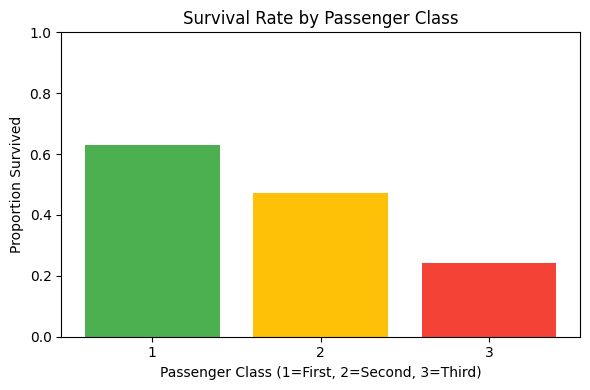

In [23]:
# ---------------------------------------------------------
# 12. SURVIVAL RATE BY 'pclass' (1st/2nd/3rd)
# ---------------------------------------------------------
pclass_survival = df.groupby('pclass')['survived'].mean()

print("Survival rate by passenger class:")
for cls, rate in pclass_survival.items():
    print(f" • Class {cls}: {rate:.2f} ({rate*100:.1f}% survived)")

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(
    [str(cls) for cls in pclass_survival.index],
    pclass_survival.values,
    color=['#4CAF50', '#FFC107', '#F44336']
)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Proportion Survived")
plt.ylim(0, 1)
plt.xlabel("Passenger Class (1=First, 2=Second, 3=Third)")
plt.tight_layout()
plt.show()


`7. Pairplot & Correlation Matrix`

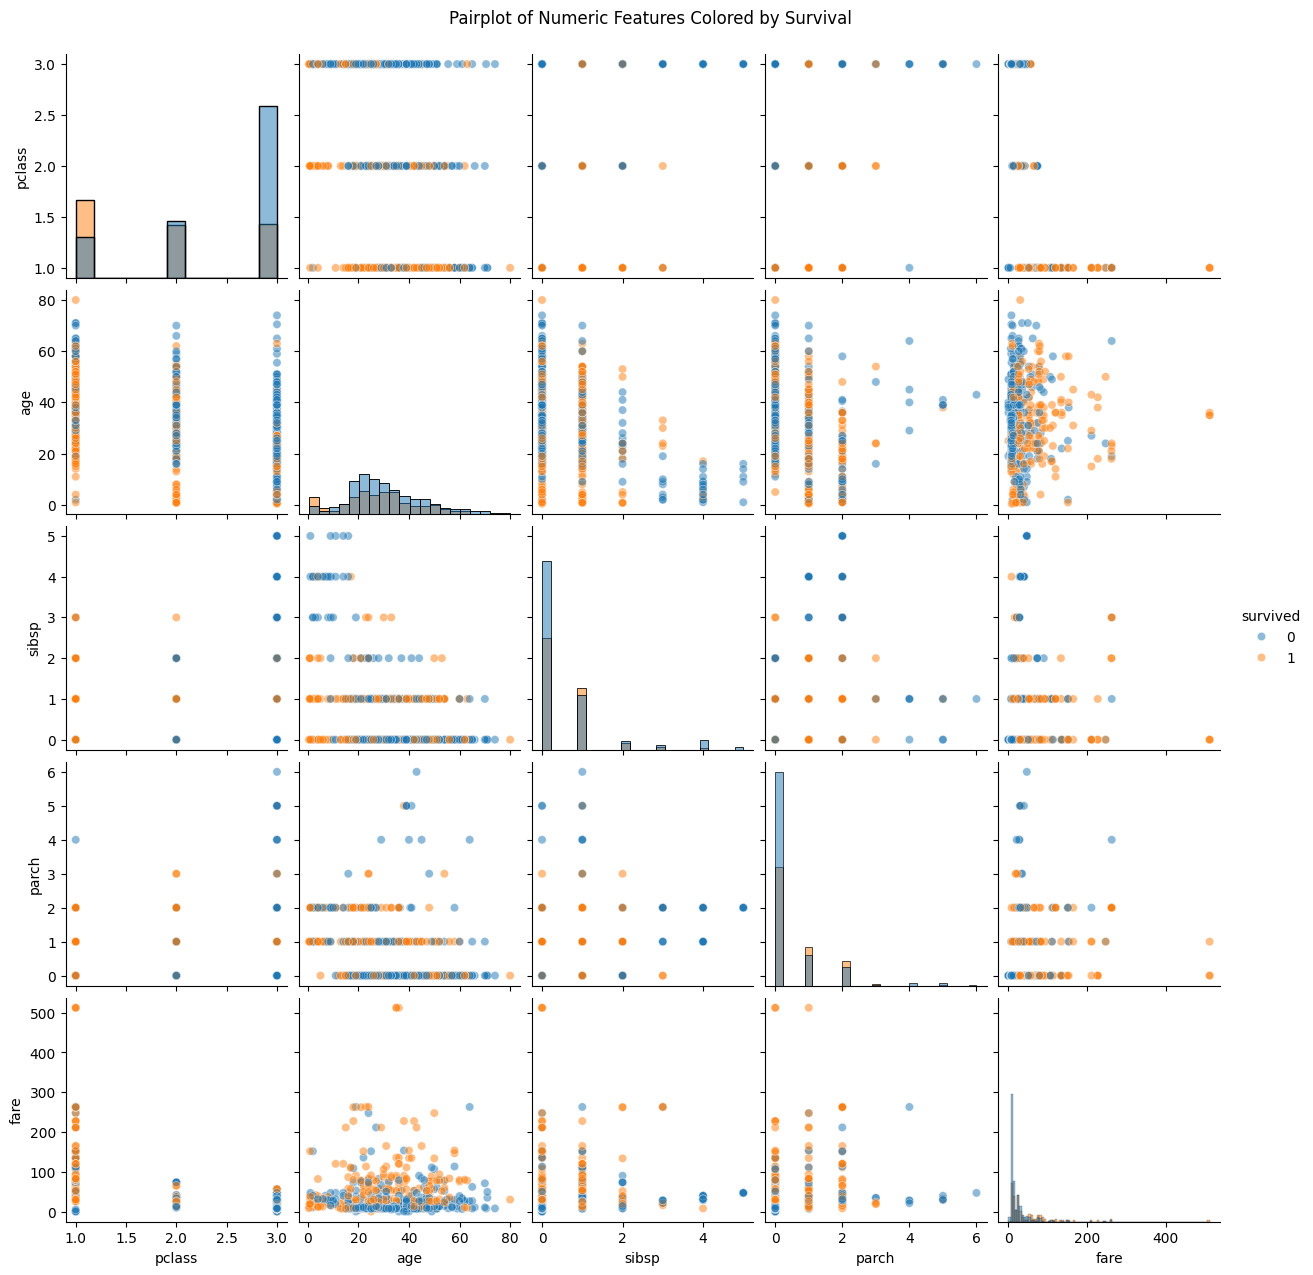

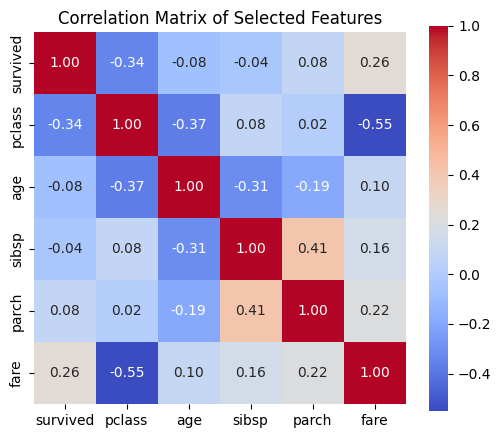


Correlation Matrix:


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [24]:
# ---------------------------------------------------------
# 13. PAIRPLOT FOR SELECTED NUMERIC FEATURES
#     We include: 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'
# ---------------------------------------------------------

sns.pairplot(
    df[ ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'] ].dropna(),
    hue='survived',
    plot_kws={'alpha': 0.5},
    diag_kind='hist'
)
plt.suptitle("Pairplot of Numeric Features Colored by Survival", y=1.02)
plt.show()


# ---------------------------------------------------------
# 14. CORRELATION MATRIX HEATMAP
# ---------------------------------------------------------

# Compute correlation matrix for the same set of columns
corr_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,      # show correlation values
    fmt='.2f',       # format to 2 decimal places
    cmap='coolwarm',
    square=True
)
plt.title("Correlation Matrix of Selected Features")
plt.show()

print("\nCorrelation Matrix:")
display(corr_matrix)


## **Observations & Patterns**

1. **Age Distribution:**  
   - The histogram for `age` shows most passengers clustered between ages 20–40, with fewer children (< 10) and fewer elderly (> 60).  

2. **Fare Distribution:**  
   - The `fare` histogram is right‐skewed: a small number of passengers paid very high fares (> 100), but most paid between 0–50.  
   - Check the boxplot for outliers; many fares are beyond 1.5×IQR on the high side.  

3. **Survival by Gender:**  
   - Females had a much higher survival rate ~74% than males ~19%.  
   - This “women and children first” policy is reflected clearly in the data.  

4. **Survival by Class:**  
   - 1st class passengers have about ~63% survival.  
   - 2nd class are around ~47%.  
   - 3rd class only ~25%.  
   - Indicates a strong socioeconomic effect on survival.  

5. **Correlation Matrix:**  
   - `survived` vs. `pclass` is negatively correlated (e.g., r ≈ −0.33).  
   - `survived` vs. `fare` is positively correlated (e.g., r ≈ +0.26).  
   - `sibsp` and `parch` correlate positively with each other (people traveling with family).  
   - Age has a weak negative correlation with survival (slightly lower chance for older passengers).  

6. **Pairplot Patterns:**  
   - You can see the clusters (or separation) between survivors and non-survivors when plotted against combinations of `pclass`, `age`, and `fare`.  
   - For example, survivors in 1st class appear to occupy a different region in (pclass vs. fare) space.  

7. **Anomalies / Missing Data:**  
   - Columns like `embarked` have a few missing values.  
   - `age` is missing for ~177 of 891 passengers.  
   - One passenger has a fare of 0 → check if that was a “deckhand”/crew or a child.


## **Inferences from EDA**

1. **Socioeconomic Status Matters**  
   - Clear evidence that 1st‐class passengers survived more often than 3rd‐class.  
   - Likely due to easier access to lifeboats and preferential treatment.

2. **Gender Gap in Survival**  
   - Dramatic difference: female survival ~74% vs. male ~19%.  
   - Confirms “women and children first” policy, though we did not break out children separately here.

3. **Fare as a Proxy for Class & Wealth**  
   - Higher fares correlate with higher survival.  
   - But because fare and class strongly correlate, make sure to disentangle if you build a model (avoid multicollinearity).

4. **Age Effects**  
   - Very young children (age < 10) show a slightly elevated survival compared to middle‐aged men.  
   - Elderly (age > 60) appear to have lower survival, though sample size is small.

5. **Family Connections**  
   - You might notice that people traveling with “just one sibling/spouse” had slightly better survival than those traveling alone or with large families.  
   - This suggests “family size” could become a useful new feature in modeling.

_End of EDA Notebook._